# Agent phase diagram

In a network the agent represents an node which can share the news based on porperties of the news and on the neighbouring agents. An agent is characerized by two atributes:
* `truth_weight`: This value indicates how important it is for an agent that the news has a high truth likelihood. This value will be considered in the calculation of the agent's exictement score for the news.
* `share_threshold`: If the excitement score is bigger than the share threshold the agent shares the news.

Below we want to invesigate the spreading of the news in a network depending on the share threshold and the truth weight of the agents and the fitness of the news.  

For the simulations all agents are modelled equally, i.e. same share threshold and the same truth weight.

## Simulations

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

Add parent directory to path (directory which holds the code)

In [2]:
import os
import sys
sys.path.append(os.path.dirname(os.path.abspath('')))

Import `World` and `Agent` class

In [3]:
from classes.world import World
from classes.agent import Agent

Define function which generates a matrix with percentages of how many agents shared the news for different values of `share_threshold` and `truth_weight`.

In [4]:
def generate_share_map(num_bins=51, num_agents=100, num_updates=10, news_fitness=1.0):
    share_thresholds = np.linspace(0, 1, num_bins)
    truth_weights = np.linspace(0, 1, num_bins)
    
    df = pd.DataFrame(columns=['share threshold', 'truth weight', 'number shared'])
    
    print(f'Starting simulation of {num_agents} agents (this may take some time...)')
    
    for share_threshold in share_thresholds:
        for truth_weight in truth_weights:
            agents = [Agent(share_threshold, truth_weight) for _ in range(num_agents)]
            
            world = World(num_agents=num_agents, agents=agents, news_fitness=news_fitness)
            world.update(time_steps=num_updates)
            
            sharing_agents = world.get_number_sharing_agents()
            num_sharing = pd.DataFrame([[share_threshold, truth_weight, sharing_agents]], columns=df.columns)
            df = df.append(num_sharing, ignore_index=True)
            
    print('Simulation completed!!!')
            
    return df.astype(float).pivot('share threshold', 'truth weight', 'number shared') / num_agents

### Low fitness news

In [5]:
share_map = generate_share_map(news_fitness=0.05)

Starting simulation of 100 agents (this may take some time...)
Simulation completed!!!


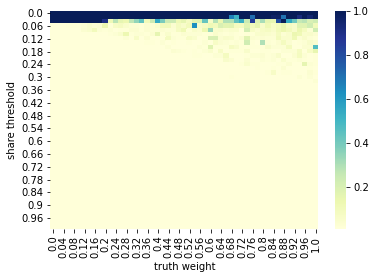

In [6]:
sns.heatmap(share_map, cmap='YlGnBu')

### Intermediate fitness news

In [7]:
share_map = generate_share_map(news_fitness=0.5)

Starting simulation of 100 agents (this may take some time...)
Simulation completed!!!


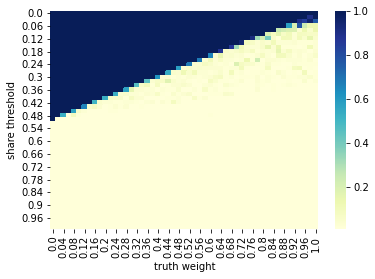

In [8]:
sns.heatmap(share_map, cmap='YlGnBu')

### High fitness news

In [9]:
share_map = generate_share_map(news_fitness=0.95)

Starting simulation of 100 agents (this may take some time...)
Simulation completed!!!


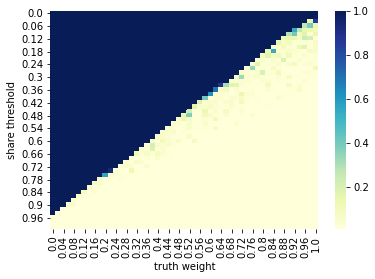

In [10]:
sns.heatmap(share_map, cmap='YlGnBu')